('\nTotal number of glucose readings is:', 8047)

Some of points may be missing glucose readings, the above number represents the collected readings from start to end date
('\nRemove NaN from the mg/dL column...', '\nTotal actual number of glucose readings is:', 7676)

Remove NaN from the CHO so we can plot the points of meals...
('Total number of meal times:', 514)

Some of the meal times do not have corresponding glucose reading, as it was not recorded at that time.
('Thus, total actual number of meal times with glucose readings is:', 497)

Some of the successive meal readings are redundant and stand for one meal only

Remove redundant readings of same meal...

('There are', 201, ' unredundant recorded glucose readings with meal times.\n')
                 Date  mg/dL  CHO (g)  Fat (g)  Protein (g)
0 2008-08-04 17:41:00  126.0   18.452   4.7660       2.9560
1 2008-08-05 05:31:00  126.0   97.360   5.7950      17.9150
2 2008-08-05 07:01:00  103.0    0.000   0.0500       0.2800
3 2008-0

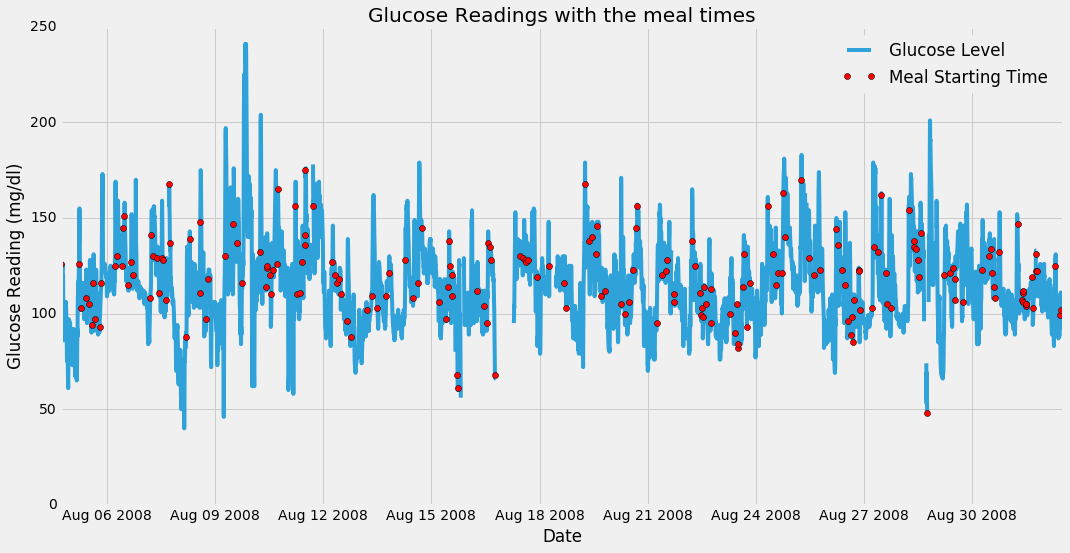

In [309]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date, time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

%matplotlib inline
#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

#_DATA_DIR = r'/Users/administrator/Desktop/New Git Diabetes/Input/input'
#_FIG_DIR = r'/Users/administrator/Desktop/New Git Diabetes/figures'
_DATA_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\Input\input'
_FIG_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\figures'


if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)
    
_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P5.csv')
fields = ["Date", "mg/dL", "CHO (g)", "Fat (g)", "Protein (g)"]
df_P1 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P1 = df_P1.sort(['Date'])

## Matplotlib Variables
_FIG_SIZE = (16, 8)
_FIG_FORMAT = 'png'
_FIG_DPI = 200

def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print ("\nTotal number of glucose readings is:", df_P1['mg/dL'].size)
print ("\nSome of points may be missing glucose readings, the above number represents the collected readings from start to end date")
#Removing NaN from a specific column of the dataframe, here it's mg/dL
df_P1_wonan_mg = df_P1.dropna(subset=['mg/dL'])
print ("\nRemove NaN from the mg/dL column...", "\nTotal actual number of glucose readings is:", df_P1_wonan_mg['mg/dL'].size)
###################
#Converting object type to float for all of the dataframe
df_P12= pd.DataFrame(df_P1).convert_objects(convert_numeric=True)
#print df_P12.dtypes
print ("\nRemove NaN from the CHO so we can plot the points of meals...")
#Removing NaN from a specific column of the dataframe, here it's CHO. isfinite can work for series, but not for dataframe
df_P12 = df_P12.dropna(subset=['CHO (g)'])
#print "\n", df_P12.head()
print ("Total number of meal times:", df_P12['CHO (g)'].size)
print ("\nSome of the meal times do not have corresponding glucose reading, as it was not recorded at that time.")
#Removing NaN from a specific column of the dataframe, here it's mg/dL
df_P12_wonan_mg = df_P12.dropna(subset=['mg/dL'])
print ("Thus, total actual number of meal times with glucose readings is:", df_P12_wonan_mg['mg/dL'].size)
print ("\nSome of the successive meal readings are redundant and stand for one meal only")
########################
#resetting dataframe index
df_P13 = df_P12_wonan_mg.reset_index(drop=True)
#print df_P13.head()

df_P14 = pd.DataFrame(df_P13)   
#print df_P14.head()

#print_full(df_P14)  

print ('\nRemove redundant readings of same meal...\n') 
row = 0
for i, x in enumerate(df_P13['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P13['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P14.drop(df_P14.index[row], axis=0, inplace=True)
                row = row - 1
#print_full(df_P14)  
                
#resetting dataframe index (1,2,3...)
df_P14 = df_P14.reset_index(drop=True)
print ("There are", df_P14['CHO (g)'].size, " unredundant recorded glucose readings with meal times.\n")

print (df_P14.head())
#print df_P14

#reindexing the dataframe with the Date column-- This will remove Date column but that is needed for graphing
#df_P14 = df_P14.set_index('Date')

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df_P1.Date, df_P1['mg/dL'], '-', label="Glucose Level");
plt.plot_date(df_P14.Date, df_P14['mg/dL'], 'ro', label="Meal Starting Time")
plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Glucose Readings with the meal times'
plt.title(title);
#change title to include date of first index and last index
#title = 'Glucose readings for P1 between {} - 2008-07-27'.format(_BEGINNING_DATE)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.savefig(fig_path, dpi=_FIG_DPI)


In [310]:
import bisect
#Count number of meals within
incr = 5
print ("\nThis patient has a total of", df_P14['CHO (g)'].size, "meals of the following sizes:\n")
cho_max = df_P14['CHO (g)'].max()
#print cho_max
cho_range = [i for i in np.arange(incr, cho_max+incr, incr)]
#print cho_range

count = [0 for x in range(len(cho_range))]

cho_max = df_P14['CHO (g)'].max()

for item in df_P14['CHO (g)']:
    pos = bisect.bisect_left(cho_range, item)
    if pos == len(cho_range):
        print ("This value", item, "is out of range")
    else:
        count[pos] += 1
#print count

for i, j in enumerate(cho_range):
    if i == 0:
        print ("There are", count[i], "meals with CHO less than", cho_range[i], "grams")
    else:
        print ("There are", count[i], "meals with CHO between", cho_range[i-1], "and", cho_range[i],  "grams.")

zero_count = 0        
for x in range(df_P14['CHO (g)'].size):
    if df_P14['CHO (g)'][x] <= 1:
        zero_count +=1
        
print ("\nThe are",zero_count, "occurrences of meals of size less than 1gram of CHO")
        
print ("\nThe mean of the total # of meals is:",df_P14['CHO (g)'].mean())
print ("The std of the total # of meals is:",df_P14['CHO (g)'].std())
print ("The min meal size is:",df_P14['CHO (g)'].min(), "while the max meal size is:", df_P14['CHO (g)'].max())

('\nThis patient has a total of', 201, 'meals of the following sizes:\n')
('There are', 31, 'meals with CHO less than', 5.0, 'grams')
('There are', 26, 'meals with CHO between', 5.0, 'and', 10.0, 'grams.')
('There are', 13, 'meals with CHO between', 10.0, 'and', 15.0, 'grams.')
('There are', 21, 'meals with CHO between', 15.0, 'and', 20.0, 'grams.')
('There are', 12, 'meals with CHO between', 20.0, 'and', 25.0, 'grams.')
('There are', 41, 'meals with CHO between', 25.0, 'and', 30.0, 'grams.')
('There are', 17, 'meals with CHO between', 30.0, 'and', 35.0, 'grams.')
('There are', 1, 'meals with CHO between', 35.0, 'and', 40.0, 'grams.')
('There are', 10, 'meals with CHO between', 40.0, 'and', 45.0, 'grams.')
('There are', 4, 'meals with CHO between', 45.0, 'and', 50.0, 'grams.')
('There are', 5, 'meals with CHO between', 50.0, 'and', 55.0, 'grams.')
('There are', 2, 'meals with CHO between', 55.0, 'and', 60.0, 'grams.')
('There are', 6, 'meals with CHO between', 60.0, 'and', 65.0, 'grams

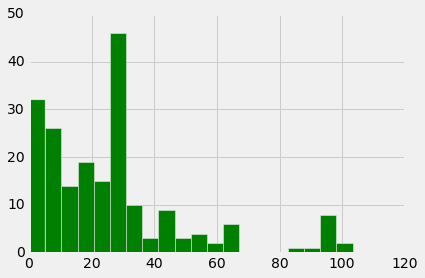

In [311]:
n, bins, patches = plt.hist(df_P14['CHO (g)'], 20, facecolor='green', alpha=1)

# from pandas.tools.plotting import bootstrap_plot
# bootstrap_plot(df_P14['mg/dL'], size=50, samples=50, color='grey')

In [312]:
#This cell is for the interactive plotting using bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models.markers import Asterisk
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid
from bokeh.models import HoverTool

# output to static HTML file
output_file("lines.html")

plot = figure(plot_width=1250, plot_height=600, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

s1 = plot.line(df_P1.Date, df_P1['mg/dL'],  line_width=2, line_alpha=0.6)
s2 = plot.square(df_P1.Date, df_P1['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="green")

source = ColumnDataSource(dict(x=df_P14.Date, y=df_P14['mg/dL'], z=df_P14['CHO (g)']))

glyph_1 = Asterisk(x="x", y="y", line_color="#f0027f", fill_color=None, line_width=8)
s3 = plot.add_glyph(source, glyph_1)

plot.add_tools(HoverTool(renderers=[s3], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('Meal Size (grams)', '@z')
]))

# show the results
show(plot)

# Critical Assumptions

1) If readings following the meal time reading are all below it then that is not normal and we'll exclude those meal times. This  true especially if many readings after 20mins are still below the meal time reading because in some cases it takes a few minutes for the food assumption to be reflected on the glucose.

Example: The two right meals in the figure below should be excluded.

**Possible Implementation 1**
If the average of the meals 20min to 45mins is below the meal glucose level, then exclude that point. --Or if it is also within a +5mg/dl then exclude since it is an insignificant increase.

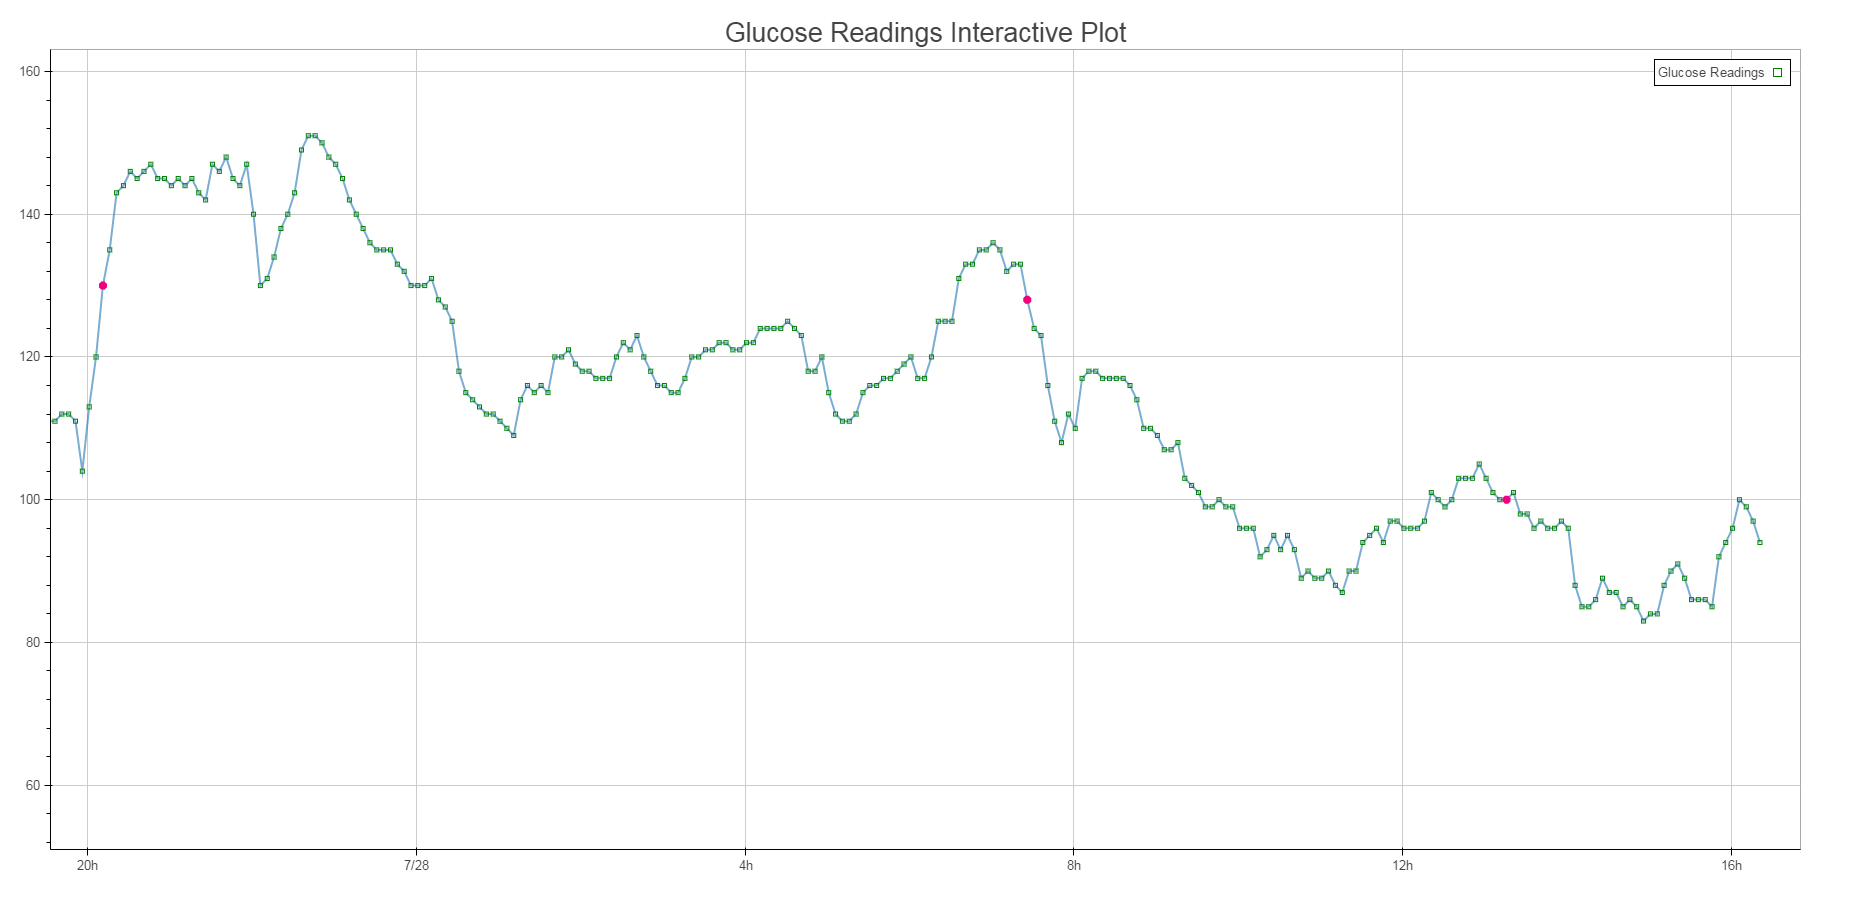

In [313]:
from IPython.display import Image
#If the image is not on the same path, use next line
#fig_path = os.path.join(_FIG_DIR, 'Assumption 1.png')
Image(filename= 'Assumption 1.png')

2) Patients did not record all meal times. Also, we notice that throughout the day the glucose increases --significantly sometimes-- without having a food intake. Thus, for our work we will extract only the plots following food intake.

***Assumption 1 implementation***

In [314]:
import datetime

incr = 5 #5 minutes increment - Do not change this as data is recorded every 5 mins
window_size = 25 #This is in minutes 
window_offset = 15 #This represents the minutes that food intake usually takes before it is reflected on BG

window = [i for i in np.arange(incr+window_offset, window_size+incr+window_offset, incr)]
#print window
count = 0
rows_to_del = []

for x, item in enumerate(df_P14['CHO (g)']):
    a = df_P14['Date'][x]
    #print "a is ", a, "and its glucose level is", df_P1.loc[a]['mg/dL']
    b = a + datetime.timedelta(minutes=window_offset)
    avg_arr = []
    meal_reading = df_P1.loc[df_P1['Date'] == a]['mg/dL']
    for i in window:
        b += datetime.timedelta(minutes=incr)
        next_reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']
        #print next_reading.values[0]
        avg_arr.append(next_reading.values[0])
        #Use below if df_P1 is indexed by date
        #avg_arr.append(df_P1.loc[b]['mg/dL'])
    #print avg_arr
    #print np.mean(avg_arr) 
    if np.mean(avg_arr) < meal_reading.values[0]:
        count +=1
        #print "x is",  x
        rows_to_del.extend([x])
print ("There are", count, "occurrences where the glucose keep decreasing after food intake for more than {} minutes.".format(window_size+incr+window_offset))
#print "\nThe rows to be deleted are:\n", rows_to_del  
#Let's copy df_P14 into a different dataframe that we will modify-- df_P15 will be the desired dataframe to work with
df_P15 = pd.DataFrame(df_P14)
df_P15.drop(df_P15.index[rows_to_del],axis=0,inplace=True)    
df_P15 = df_P15.sort(['Date'])
df_P15 = df_P15.reset_index(drop=True)

z = [i for i in range(df_P14['CHO (g)'].size)]
rows_to_keep = set(z) - set(rows_to_del)
rows_to_keep = list(rows_to_keep)

#This dataframe has the readings which do not abide wiht our assumption, we have in case we want to plot the readings
df_P16 = pd.DataFrame(df_P14)
df_P16.drop(df_P16.index[rows_to_keep],axis=0,inplace=True)
#print "\nThe rows to be kept are:\n", rows_to_keep 
df_P16 = df_P16.sort(['Date'])
df_P16 = df_P16.reset_index(drop=True)


('There are', 76, 'occurrences where the glucose keep decreasing after food intake for more than 45 minutes.')


Below are plots of our above implementation, where we compare the average of the readings following the meal time to meal BG reading. 

The proposed solution of comparing the average of the glucose readings following the meal is not the best solution for the first assumption, mainly because it is not predictable when the food will be reflected on blood glucose.

In [315]:
# output to static HTML file
output_file("lines2.html")

plot = figure(plot_width=1250, plot_height=600, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

plot.line(df_P1.Date, df_P1['mg/dL'],  line_width=2, line_alpha=0.6)
plot.square(df_P1.Date, df_P1['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="green")

good_readings = ColumnDataSource(dict(x=df_P15.Date, y=df_P15['mg/dL'], z=df_P15['CHO (g)'], k = df_P15['Fat (g)'], d = df_P15['Protein (g)']))

glyph_1 = Asterisk(x="x", y="y", line_color="#f0027f", fill_color=None, line_width=8)
g1 = plot.add_glyph(good_readings, glyph_1)
bad_readings = ColumnDataSource(dict(x=df_P16.Date, y=df_P16['mg/dL'], z=df_P16['CHO (g)'], k = df_P16['Fat (g)'], d = df_P16['Protein (g)']))

glyph_2 = Asterisk(x="x", y="y", line_color="#0404B4", fill_color=None, line_width=8)
g2 = plot.add_glyph(bad_readings, glyph_2)

plot.add_tools(HoverTool(renderers=[g1, g2], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('CHO (g)', '@z'),
    ('Fat (g)', '@k'),
    ('Protein (g)', '@d')
]))

plot.xaxis.axis_label = "Date & Time"
plot.yaxis.axis_label = "Glucose Reading (mg/dL)"

# show the results
show(plot) 

The result plot shows that it may take a while for the food intake to be reflected on the blood. This of course depends of the type of food.

### Assumptions for Deletion of Meal times

1) If all readings following the meal time are decreasing for a duration more than 45mins then **delete that meal point**.

#### Implementataion of Assumption 1

1) If the succeeding point is less than the current one for a window of 45mins => meaning it is decreasing all the way through

Window size can be a variable

In [316]:
df_P1_Cleaned = copy.deepcopy(df_P14)

#print df_P1_Cleaned

incr = 5 #5 minutes increment - Do not change this as data is recorded every 5 mins
assumption1_ws = 45 #This reprensents the minutes food may take to be reflected on the blood glucose
pre_recording_mins = 15#This value represents the minutes that may have elapsed before patient has recorded the reading

window = [i for i in np.arange(incr, assumption1_ws+incr, incr)]
full_window = [i for i in np.arange(-(pre_recording_mins), assumption1_ws+incr, incr)]

#print window
count = 0
rows_assump1 = []
points_to_del = []
del_points_df = pd.DataFrame()

for x, item in enumerate(df_P14['CHO (g)']):
    a = df_P14['Date'][x]
    #print "a is ", a, "and its glucose level is", df_P1.loc[df_P1['Date'] == a]['mg/dL']
    
    avg_arr = []
    meal_reading = df_P1.loc[df_P1['Date'] == a]['mg/dL']
    min_reading = meal_reading.values[0]
    max_reading = meal_reading.values[0]
    b = a - datetime.timedelta(minutes=pre_recording_mins)
    keep = 0
    for i in full_window:
        compare_window = [j for j in np.arange(incr, assumption1_ws+incr, incr)]
        current_reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']
        try:
            current_reading.values[0]
        except IndexError:
            #print "Index out of range"
            b += datetime.timedelta(minutes=incr)   
            continue
        c = b
        for k in compare_window:
            c += datetime.timedelta(minutes=incr)
            compare_reading = df_P1.loc[df_P1['Date'] == c]['mg/dL']

            if (compare_reading.values[0] - current_reading.values[0] >15):
                #print "We should keep this reading"
                keep = 1  
                break
        if (keep == 1):
            break
        b += datetime.timedelta(minutes=incr)     
        if (i == full_window[-1]):
            #print ("This meal point should definitely be deleted", a)   
            #Put this into an dataframe to plot with different color
            del_points_df = del_points_df.append(df_P1.loc[df_P1['Date'] == a])
            #Also remove this from dataset   
            points_to_del.extend([x])                     
                
#print "\nThe dataframe of the points to be deleted is:\n", del_points_df 
print (points_to_del)

print "\nThere are", len(points_to_del), "that will be deleted"

df_P1_Cleaned.drop(df_P1_Cleaned.index[points_to_del],axis=0,inplace=True)
#print "\nThe rows to be kept are:\n", rows_to_keep 
df_P1_Cleaned = df_P1_Cleaned.sort(['Date'])
df_P1_Cleaned = df_P1_Cleaned.reset_index(drop=True)

print "The number of original meals are", df_P14['CHO (g)'].size
print "The number of meals that were kept are", df_P1_Cleaned['CHO (g)'].size


df_P1_New=copy.deepcopy(df_P1_Cleaned)   

[0, 2, 15, 21, 24, 26, 27, 33, 46, 56, 57, 58, 59, 62, 65, 66, 70, 74, 77, 83, 84, 85, 86, 87, 90, 91, 98, 101, 102, 105, 106, 108, 113, 114, 116, 118, 121, 122, 133, 135, 137, 144, 153, 159, 170, 179, 180, 183, 185, 186, 187, 188, 189, 190, 191, 192, 197, 200]

There are 58 that will be deleted
The number of original meals are 201
The number of meals that were kept are 143


In [317]:
del_points_df['CHO (g)'] = del_points_df['CHO (g)'].convert_objects(convert_numeric=True)
del_points_df['Fat (g)'] = del_points_df['Fat (g)'].convert_objects(convert_numeric=True)
del_points_df['Protein (g)'] = del_points_df['Protein (g)'].convert_objects(convert_numeric=True)

del_points_df.describe()

,mg/dL,CHO (g),Fat (g),Protein (g)
count,58.000000,58.000000,58.000000,58.000000
mean,120.879310,19.049625,4.629445,3.656896
std,17.192489,14.494871,5.683758,3.478074
min,68.000000,0.000000,0.000000,0.130000
25%,108.250000,6.500000,0.063125,0.661667
50%,120.000000,18.446000,1.867000,2.436667
75%,130.000000,27.955500,8.618750,5.543950
max,168.000000,64.906667,20.200000,11.943333


**Assumption for deletion 2**

Here, we will delete the meal times that have many missing glucose readings following them. This is because we can not fit a model on many missing points. However, we may later keep these points if we are interested on the meal times only and not the readings following them.

In [318]:
window_size = 17 #This represents that size window based on increments of 5. I.e: 17 represents a window of (17*5) + 5 = 90 mintues
del_points_df2 = pd.DataFrame()
points_to_del2 = []

for x in range(df_P1_New['CHO (g)'].size):
    a = df_P1_New['Date'][x]
    b = a
    count = 0
    for j in range(window_size):
        b += datetime.timedelta(minutes=incr)
        reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']
        if (math.isnan(reading.values[0])):
            count +=1
    if (count > (window_size/2)):
        print "The meal time at", a, "has", count,"missing readings within its {}".format((window_size*5)+5),"minutes."
        #print ("This meal point should definitely be deleted", a)   
        #Put this into an dataframe to plot with different color
        del_points_df2 = del_points_df2.append(df_P1.loc[df_P1['Date'] == a])
        #Also remove this from dataset   
        points_to_del2.extend([x])  

df_P1_New.drop(df_P1_New.index[points_to_del2],axis=0,inplace=True)
#print "\nThe rows to be kept are:\n", rows_to_keep 
df_P1_New = df_P1_New.sort(['Date'])
df_P1_New = df_P1_New.reset_index(drop=True)

df_P1_w_all_deletion = copy.deepcopy(df_P1_New)

The meal time at 2008-08-07 15:26:00 has 10 missing readings within its 90 minutes.
The meal time at 2008-08-18 06:16:00 has 14 missing readings within its 90 minutes.


In [319]:
# output to static HTML file
output_file("lines4.html")

plot = figure(plot_width=1250, plot_height=600, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

plot.line(df_P1.Date, df_P1['mg/dL'],  line_width=2, line_alpha=0.6)
plot.square(df_P1.Date, df_P1['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="grey")

good_readings = ColumnDataSource(dict(x=df_P1_New.Date, y=df_P1_New['mg/dL'], z=df_P1_New['CHO (g)'], k = df_P1_New['Fat (g)'], d = df_P1_New['Protein (g)']))
glyph_1 = Asterisk(x="x", y="y", line_color="#f0027f", fill_color=None, line_width=8)
g1 = plot.add_glyph(good_readings, glyph_1)

bad_readings = ColumnDataSource(dict(x=del_points_df.Date, y=del_points_df['mg/dL'], z=del_points_df['CHO (g)'], k = del_points_df['Fat (g)'], d = del_points_df['Protein (g)']))
glyph_2 = Asterisk(x="x", y="y", line_color="#0404B4", fill_color=None, line_width=8)
g2 = plot.add_glyph(bad_readings, glyph_2)

missing_readings = ColumnDataSource(dict(x=del_points_df2.Date, y=del_points_df2['mg/dL'], z=del_points_df2['CHO (g)'], k = del_points_df2['Fat (g)'], d = del_points_df2['Protein (g)']))
glyph_3 = Asterisk(x="x", y="y", line_color="#32CD32", fill_color=None, line_width=8)
g3 = plot.add_glyph(missing_readings, glyph_3)

plot.add_tools(HoverTool(renderers=[g1, g2,g3], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('CHO (g)', '@z'),
    ('Fat (g)', '@k'),
    ('Protein (g)', '@d')
]))

plot.xaxis.axis_label = "Date & Time"
plot.yaxis.axis_label = "Glucose Reading (mg/dL)"

# show the results
show(plot) 

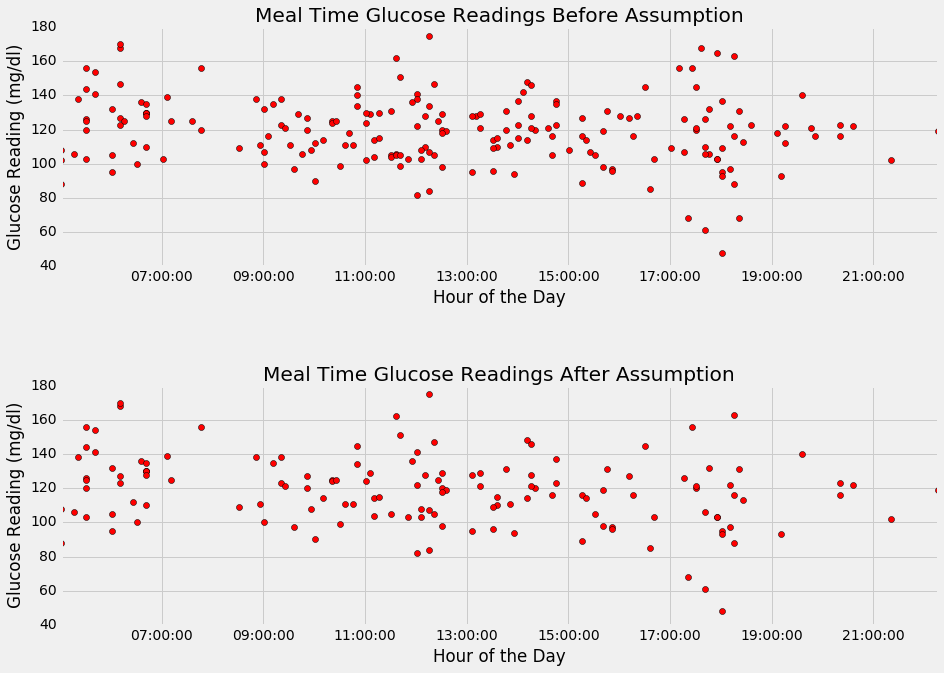

In [320]:
import matplotlib.dates as md

d = datetime.datetime.today()
for i in range(len(df_P1_New)):
    #dt = df6.Date[i].replace(year=2009, month=5, day=25)
    dt = df_P1_New.Date[i].replace(year=d.year, month=d.month, day=d.day)    
    df_P1_New.Date[i] = dt

#Both lines below do same can copy contect to new dataframe, but do not use df_all_readings = pd.DataFrame(df_P14) as df_P14 will be modified if other is
#df_all_readings = pd.DataFrame(df_P14).convert_objects(convert_numeric=True)
df_all_readings = copy.deepcopy(df_P14)

d = datetime.datetime.today()
for i in range(len(df_all_readings)):
    #dt = df6.Date[i].replace(year=2009, month=5, day=25)
    dt = df_all_readings.Date[i].replace(year=d.year, month=d.month, day=d.day)    
    df_all_readings.Date[i] = dt

fig = plt.figure(figsize= (14,10))
plt.subplots_adjust(hspace=0.5)
sub1 = fig.add_subplot(211)
sub1.set_xlabel('Hour of the Day')
sub1.set_ylabel('Glucose Reading (mg/dl)')
sub1.set_title('Meal Time Glucose Readings Before Assumption')
plt.plot_date(df_all_readings.Date, df_all_readings['mg/dL'], 'ro', label="Meal Times")

sub2 = fig.add_subplot(212)
sub2.set_xlabel('Hour of the Day')
sub2.set_ylabel('Glucose Reading (mg/dl)')
sub2.set_title('Meal Time Glucose Readings After Assumption')
plt.plot_date(df_P1_New.Date, df_P1_New['mg/dL'], 'ro', label="Meal Times")


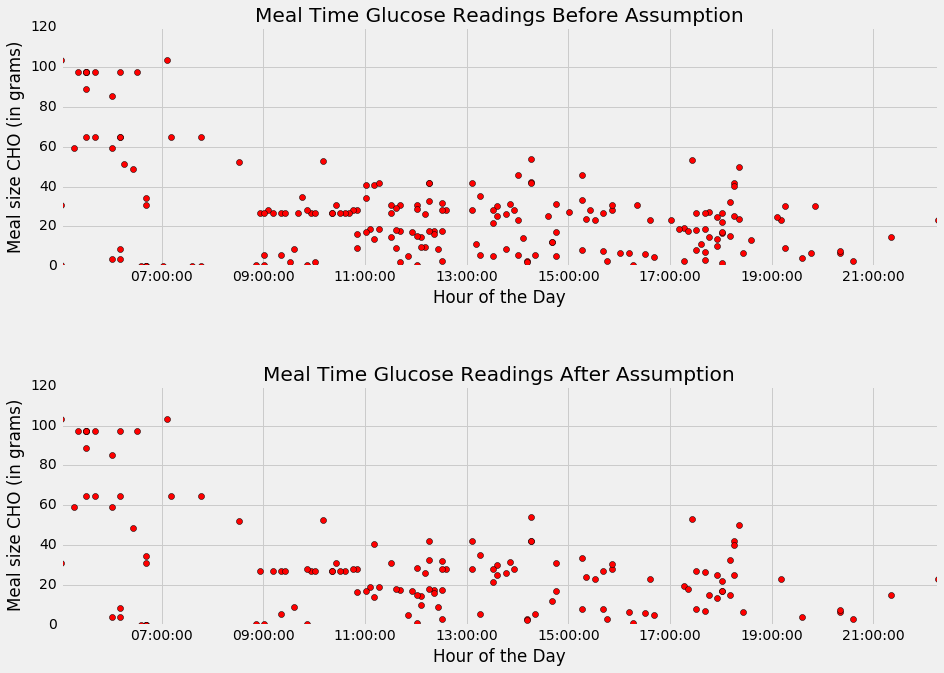

In [321]:
fig = plt.figure(figsize= (14,10))
plt.subplots_adjust(hspace=0.5)
sub1 = fig.add_subplot(211)
sub1.set_xlabel('Hour of the Day')
sub1.set_ylabel('Meal size CHO (in grams)')
sub1.set_title('Meal Time Glucose Readings Before Assumption')
plt.plot_date(df_all_readings.Date, df_all_readings['CHO (g)'], 'ro', label="Meal Times")

sub2 = fig.add_subplot(212)
sub2.set_xlabel('Hour of the Day')
sub2.set_ylabel('Meal size CHO (in grams)')
sub2.set_title('Meal Time Glucose Readings After Assumption')
plt.plot_date(df_P1_New.Date, df_P1_New['CHO (g)'], 'ro', label="Meal Times")



### Plot Extraction

1. Let's extract plots within the range of [x-15mins to (x+8hours or next increase of over 15mg/dl)]
    Breakfast
    Lunch
    Dinner

2. Overlay all plots under same day

In [434]:
after_reading = 180 #size of the plot after meal time in minutes
Plot_window = [i for i in np.arange(-(pre_recording_mins), after_reading+incr, incr)]

print Plot_window

df_all_plots = pd.DataFrame(columns=Plot_window)
    
for x in range(df_P1_w_all_deletion['CHO (g)'].size):
    #save the readings surrounding every meal time in a new dataframe
    a = df_P1_w_all_deletion['Date'][x]
    b = a - datetime.timedelta(minutes=pre_recording_mins)
    reading_list = []
    for j in Plot_window:
        reading = df_P1.loc[df_P1['Date'] == b]['mg/dL']       
        try:
            reading.values[0]
        except IndexError:
            #print "Index out of range"
            reading_list.append(float('nan'))
            b += datetime.timedelta(minutes=incr)   
            continue  
        #store this value on the jth column of xth row of the new dataframe
        reading_list.append(reading.values[0])
        b += datetime.timedelta(minutes=incr)
    #print reading_list
    #print df_all_plots.shape
    df_all_plots.loc[x]=reading_list
print df_all_plots
        

[-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180]
      -15    -10    -5      0      5      10     15     20     25     30   \
0    116.0  121.0  125.0  126.0  137.0  138.0  151.0  155.0  148.0  134.0   
1    107.0  102.0  103.0  108.0  114.0  113.0  109.0  122.0  123.0  121.0   
2    106.0  104.0  103.0  105.0  110.0  117.0  122.0  125.0  128.0  128.0   
3     98.0   91.0   90.0   94.0   95.0   96.0   96.0   99.0  103.0  103.0   
4    103.0  106.0  113.0  116.0  115.0  115.0  120.0  120.0  123.0  130.0   
5    108.0  104.0  101.0   97.0   93.0   91.0   92.0   95.0  104.0  109.0   
6     93.0   90.0   91.0   93.0   94.0   96.0   97.0   99.0  101.0  103.0   
7    111.0  113.0  115.0  116.0  116.0  120.0  125.0  132.0  139.0  147.0   
8    117.0  117.0  117.0  125.0  139.0  155.0  166.0  169.0  162.0  155.0   
9    126.0  124.0  127.0  130.0  129.0  132.0  136.0

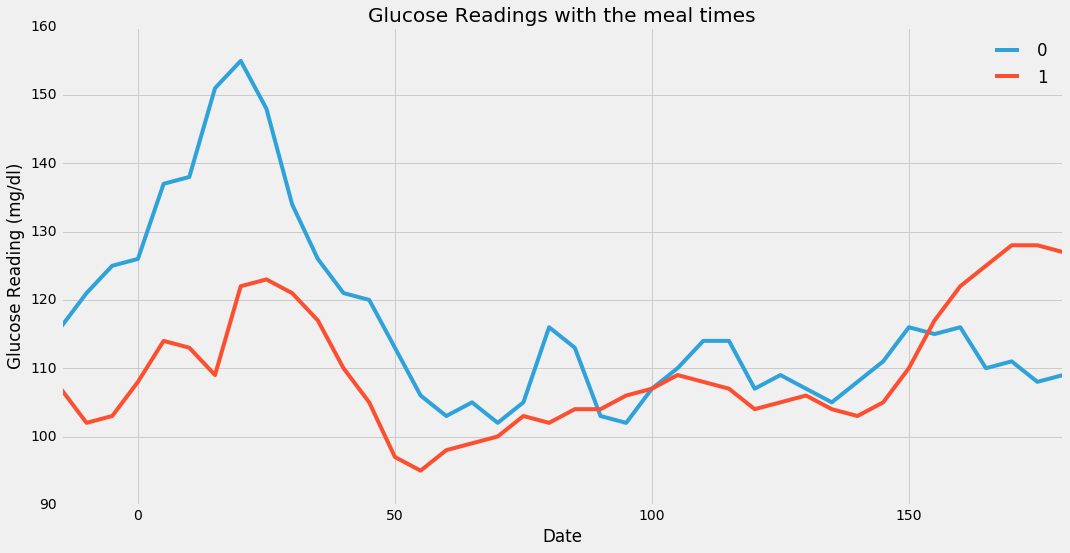

In [435]:
plt.figure(figsize=_FIG_SIZE)
for j in range(2):
    row = df_all_plots.iloc[j]
    #print row
    row.plot()


plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Glucose Readings with the meal times'
plt.title(title);